## Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_orig, Y_train), (X_test, Y_test) = cifar10.load_data()
X_orig = X_orig / 255.0
X_test = X_test / 255.0

## Model

In [5]:
# 3072 192
encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3072, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(768, activation='relu'),
    tf.keras.layers.BatchNormalization(),
])

decoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(768, 1)),
    tf.keras.layers.Dense(768, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3072, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3072, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Reshape(target_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization()
])

contrast = 0.05
rotation = 0.05
height_factor = 0.15
width_factor = 0.15
seed = None

aug = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(contrast),
    tf.keras.layers.RandomRotation(rotation),
    tf.keras.layers.RandomTranslation(height_factor, width_factor),
])
aug.build(input_shape=(32, 32, 3, 1)) # Prevents Ghosting on Batches

layers = [layer for layer in encoder.layers]
layers.extend([layer for layer in decoder.layers])

autoencoder = tf.keras.Sequential(
    layers
)

In [3]:
class TheCallback(tf.keras.callbacks.Callback):
    
    def on_batch_begin(self, epoch, logs=None):
        prediction_history.append(self.model.predict(X_test[:2]))

In [4]:
autoencoder.compile('Adam', 'MSE')
prediction_history = []
history = autoencoder.fit(
    X_orig, # X_train
    X_orig, # Y_train
    validation_split=0.1,
    epochs=64,
    batch_size=1024,
    verbose=2,
    callbacks=[TheCallback()]
)
autoencoder.evaluate(X_test, X_test)

Epoch 1/64


2022-12-08 23:23:08.736758: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-12-08 23:23:09.216694: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


44/44 - 6s - loss: 0.9091 - val_loss: 95.2031 - 6s/epoch - 136ms/step
Epoch 2/64
44/44 - 3s - loss: 0.7454 - val_loss: 10.3351 - 3s/epoch - 64ms/step
Epoch 3/64
44/44 - 3s - loss: 0.6442 - val_loss: 2.3328 - 3s/epoch - 67ms/step
Epoch 4/64
44/44 - 3s - loss: 0.5529 - val_loss: 1.1989 - 3s/epoch - 65ms/step
Epoch 5/64
44/44 - 3s - loss: 0.4751 - val_loss: 0.6482 - 3s/epoch - 64ms/step
Epoch 6/64
44/44 - 3s - loss: 0.4082 - val_loss: 0.4082 - 3s/epoch - 64ms/step
Epoch 7/64
44/44 - 3s - loss: 0.3507 - val_loss: 0.3349 - 3s/epoch - 64ms/step
Epoch 8/64
44/44 - 3s - loss: 0.3012 - val_loss: 0.2865 - 3s/epoch - 64ms/step
Epoch 9/64
44/44 - 3s - loss: 0.2571 - val_loss: 0.2315 - 3s/epoch - 64ms/step
Epoch 10/64
44/44 - 3s - loss: 0.2196 - val_loss: 0.1912 - 3s/epoch - 64ms/step
Epoch 11/64
44/44 - 3s - loss: 0.1874 - val_loss: 0.1592 - 3s/epoch - 64ms/step
Epoch 12/64
44/44 - 3s - loss: 0.1604 - val_loss: 0.1888 - 3s/epoch - 65ms/step
Epoch 13/64
44/44 - 3s - loss: 0.1358 - val_loss: 0.1402 

0.011213390156626701

## One Number Training Progression Grid

In [5]:
idx = 0
prediction_history = np.array(prediction_history)
print(prediction_history.shape)

(2816, 2, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


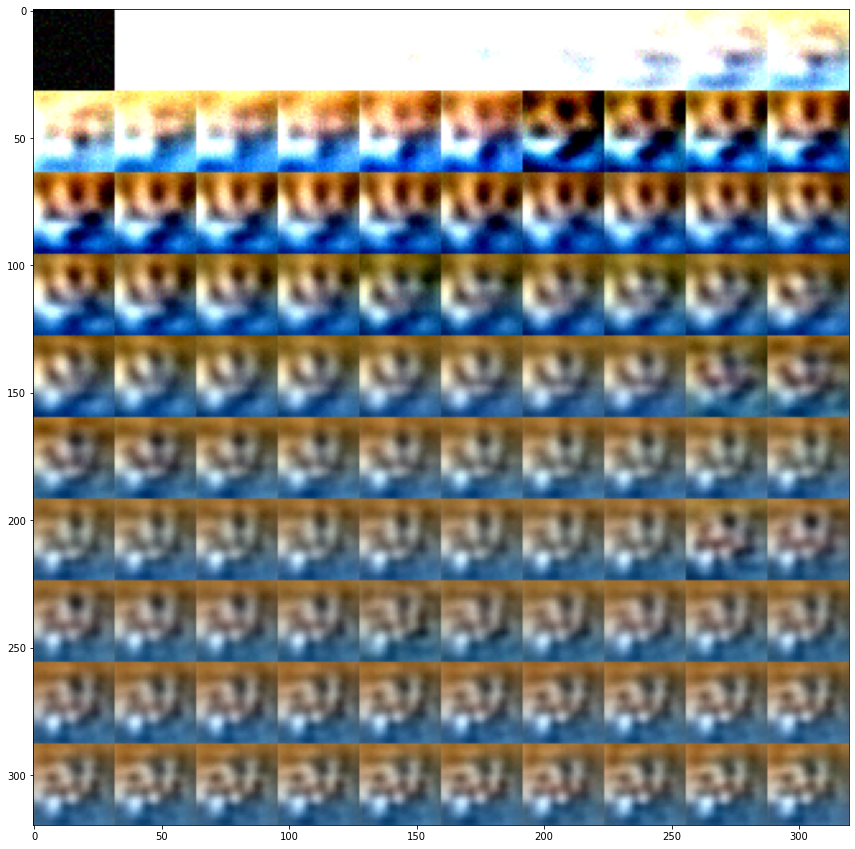

In [6]:
idx = 0
splits = 10
mult = 26
f, axarr = plt.subplots(1, 1, figsize=(15, 15))
blends = np.zeros(shape=(32 * splits, 32 * splits, 3))
other = np.zeros(shape=(32 * splits, 32 * splits, 3))
for i in range(splits):
    for j in range(splits):
        this_img = prediction_history[mult * (i*splits + j)][idx]
        blends[i*32:(i+1)*32, j*32:(j+1)*32] = this_img
        other[i*32:(i+1)*32, j*32:(j+1)*32] = prediction_history[mult * (i*splits + j)][idx]

axarr.imshow(other)
        

## Compare Orig to Result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


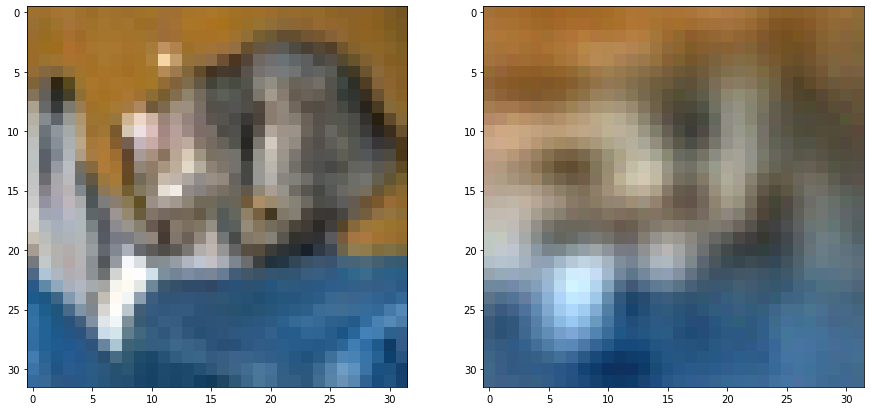

In [13]:
f, axarr = plt.subplots(1, 2, figsize=(15, 15))
axarr[0].imshow(X_test[idx])
axarr[1].imshow(autoencoder.predict(X_test[idx:idx+1])[0])

## HTML5 Video (does not animate in GitHub though)

In [12]:
from matplotlib import animation
from IPython.display import HTML
from PIL import Image, ImageSequence

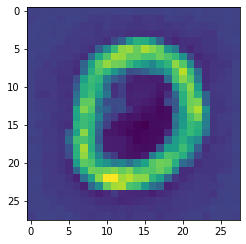

In [13]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

idx = 0

def update(i):
    frame = prediction_history[i][idx]
    ax.imshow(frame)
    ax.set_axis_off()

anim = animation.FuncAnimation(fig, update, frames=100, interval=50)
ax.imshow(prediction_history[-1][idx])

In [14]:
HTML(anim.to_html5_video())

## GIF MAKER

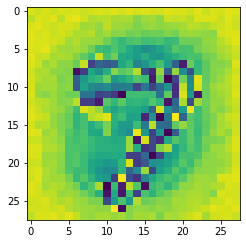

In [15]:
# https://github.com/python-pillow/Pillow/issues/4544
idx = 0
pred_numpy_array = np.array(prediction_history)
pred_numpy_array *= 255
pred_numpy_array = pred_numpy_array.astype(np.uint8)
plt.imshow(pred_numpy_array[100][idx])

ims = [Image.fromarray(pred_numpy_array[i][idx][:,:,0]) for i in range(100)]

ims[0].save('single_digit.gif', save_all=True, append_images=ims[1:], loop=0, duration=50)


In [16]:
# https://github.com/ipython/ipython/issues/10045#issuecomment-318202267
HTML('<img src="single_digit.gif" style="width:360px;heigh:360px;">')

## MP4

In [18]:
pred_numpy_array = np.array(prediction_history)

In [19]:
import cv2

output = 'tiled_video.mp4'

# https://github.com/python-pillow/Pillow/issues/4544
idx = 0
pred_numpy_array = np.array(prediction_history)
pred_numpy_array *= 255
pred_numpy_array = pred_numpy_array.astype(np.uint8)

#images = [Image.fromarray(pred_numpy_array[i][idx][:,:,0]) for i in range(100)]
images = [pred_numpy_array[i][idx][:,:,0] for i in range(100)]

This will take some time


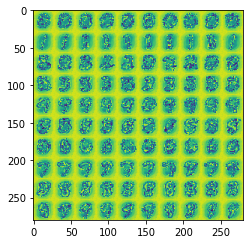

In [21]:
tiles = 10
totalFrames = 100

indexesArray = []
for i in range(10):
    Y_index = 0
    thisRow = []
    for j in range(10):
        numFound = 0
        while numFound == 0:
            if Y_test[Y_index] == i:
                thisRow.append(Y_index)
                numFound += 1
            Y_index += 1
    indexesArray.append(thisRow)


blends = np.zeros(shape=(totalFrames, 28 * tiles, 28 * tiles)).astype(np.uint8)
for frameNum in range(totalFrames):
    for i in range(tiles):
        for j in range(tiles):
            this_img = pred_numpy_array[frameNum][indexesArray[i][j]][:,:,0]
            blends[frameNum, i*28:(i+1)*28, j*28:(j+1)*28] = this_img

plt.imshow(blends[-1])
    
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output, fourcc, 30, (tiles*28, tiles*28))
print('This will take some time')
for i, blend in enumerate(blends):
    out.write(cv2.applyColorMap(cv2.cvtColor(blend, cv2.COLOR_GRAY2RGB), cv2.COLORMAP_JET))
            

out.release()

plt.imshow(blend)

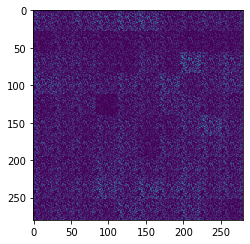

In [22]:
plt.imshow(blends[0])